<a href="https://colab.research.google.com/github/GulfemKupeli/Airline_Sentiment_API/blob/main/ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
import time

In [2]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Airline_Sentiment/Tweets.csv'

In [8]:
try:
  df = pd.read_csv(file_path)

  print(f"Dataset loaded successfully from Google Drive with {df.shape[0]} rows and {df.shape[1]} columns.")
  if 'airline_sentiment' not in df.columns:
        df = df.rename(columns={'airline_sentiment_level': 'airline_sentiment'})

  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()

  def preprocessing_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()

    tokens = text.split()
    cleaned_tokens = [
          lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
      ]
    return " ".join(cleaned_tokens)

  df['processed_text'] = df['text'].astype(str).apply(preprocessing_text)

  X = df['processed_text']
  Y = df['airline_sentiment']

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y )

  tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
  X_train_vec = tfidf_vectorizer.fit_transform(X_train)
  X_test_vec = tfidf_vectorizer.transform(X_test)

  print(f"\nTraining set vector shape: {X_train_vec.shape}")
  print(f"Test set vector shape: {X_test_vec.shape}")

except FileNotFoundError:
    print("Error: File not found at the specified Google Drive path. Please check the 'file_path' variable.")
except NameError:
    # This should not happen with the fix, but good practice to catch potential issues
    print("Error: 'df' is not defined. This might indicate an issue with data loading.")

Dataset loaded successfully from Google Drive with 14640 rows and 15 columns.

Training set vector shape: (11712, 5000)
Test set vector shape: (2928, 5000)


Training the model...
Train complete.

--- Model Review ---
Accuracy: 0.7917

Classification Report :
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1835
     neutral       0.67      0.52      0.58       620
    positive       0.80      0.58      0.67       473

    accuracy                           0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



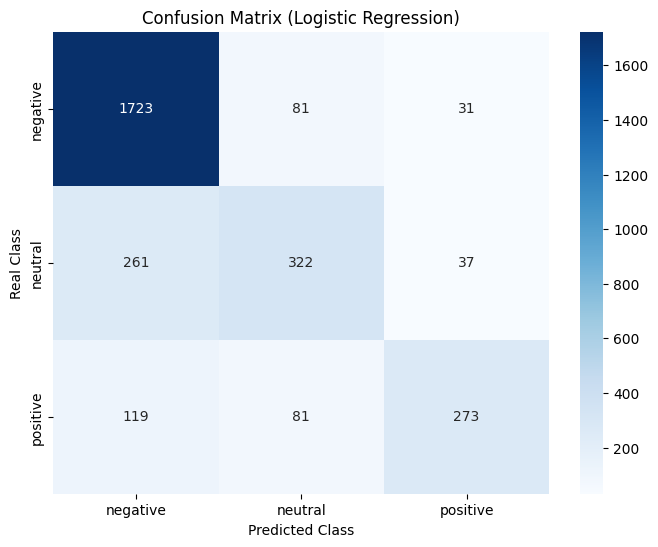

In [9]:
model = LogisticRegression(solver='saga', max_iter=1000, random_state=42, n_jobs=-1)

print("Training the model...")
model.fit(X_train_vec, Y_train)

print("Train complete.")
Y_pred = model.predict(X_test_vec)

print("\n--- Model Review ---")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report :")
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Logistic Regression)')
plt.ylabel('Real Class')
plt.xlabel('Predicted Class')
plt.show()

Training the weighet logistic regression model...
Train complete.

--- Weighted Model Review ---
Accuracy: 0.7568

New Classification Report :
              precision    recall  f1-score   support

    negative       0.90      0.79      0.84      1835
     neutral       0.53      0.70      0.60       620
    positive       0.68      0.71      0.69       473

    accuracy                           0.76      2928
   macro avg       0.70      0.73      0.71      2928
weighted avg       0.78      0.76      0.77      2928



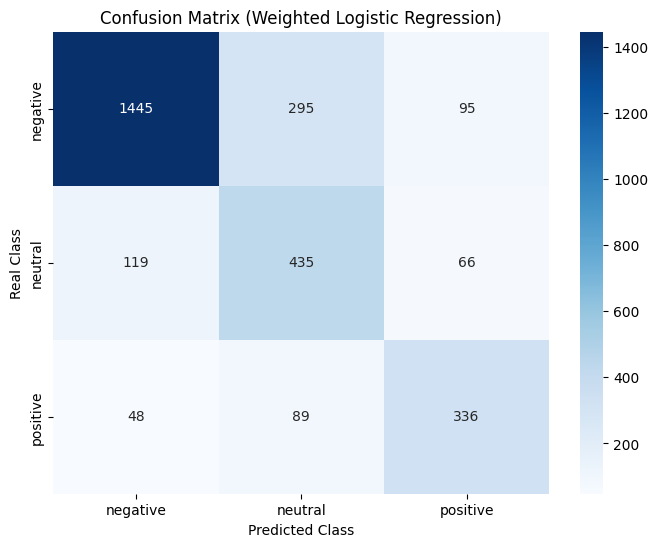

In [10]:
model_weighted = LogisticRegression(solver = 'saga', max_iter=1000, random_state=42, n_jobs=-1, class_weight='balanced')

print('Training the weighet logistic regression model...')
model_weighted.fit(X_train_vec, Y_train)

print("Train complete.")
Y_pred_weighted = model_weighted.predict(X_test_vec)

print("\n--- Weighted Model Review ---")
accuracy_weighted = accuracy_score(Y_test, Y_pred_weighted)
print(f"Accuracy: {accuracy_weighted:.4f}")

print("\nNew Classification Report :")
print(classification_report(Y_test, Y_pred_weighted))
cm_weighted = confusion_matrix(Y_test, Y_pred_weighted, labels=model_weighted.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_weighted.classes_, yticklabels=model_weighted.classes_)
plt.title('Confusion Matrix (Weighted Logistic Regression)')
plt.ylabel('Real Class')
plt.xlabel('Predicted Class')
plt.show()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/tmp/ipython-input-1807403882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df,


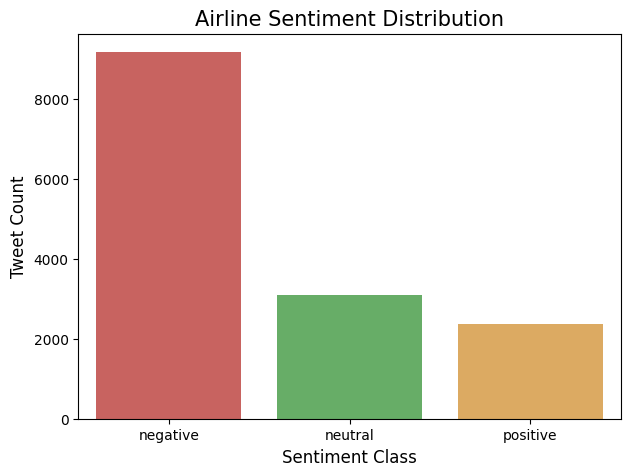

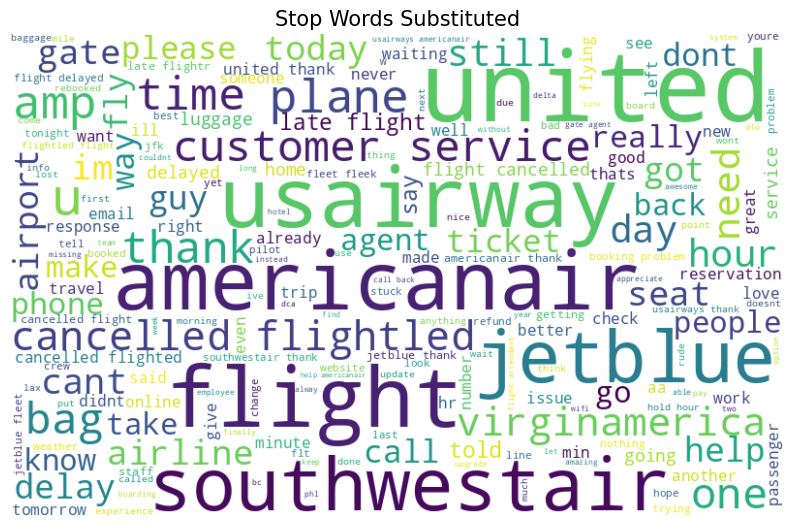

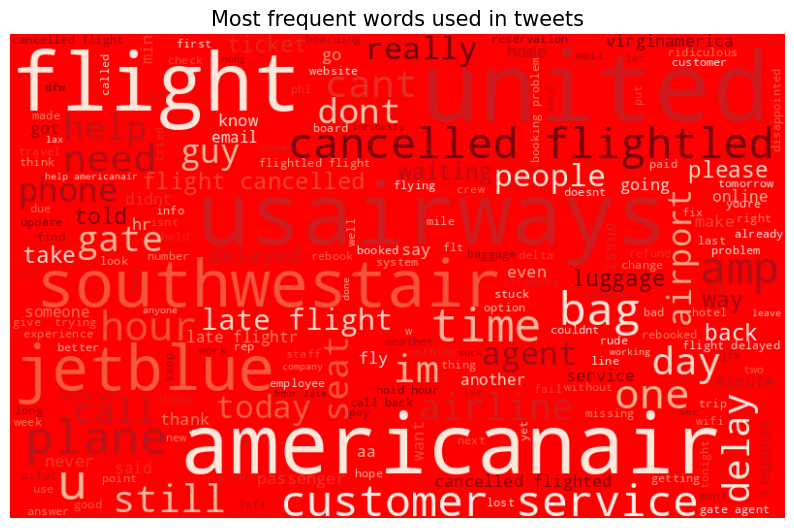

In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(x='airline_sentiment', data=df,
              order=df['airline_sentiment'].value_counts().index,
              palette=['#d9534f', '#5cb85c', '#f0ad4e'])
plt.title('Airline Sentiment Distribution', fontsize=15)
plt.xlabel('Sentiment Class', fontsize=12)
plt.ylabel('Tweet Count', fontsize =12)
plt.show()

all_words = ' '.join([text for text in df['processed_text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100,background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Stop Words Substituted', fontsize=15)
plt.show()

negative_tweets = df[df['airline_sentiment'] == 'negative']['processed_text']
negative_words = ' '.join([text for text in negative_tweets])

wordcloud_neg = WordCloud(width=800, height=500, random_state=42, max_font_size=100,
                          background_color='red', colormap='Reds').generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis('off')
plt.title('Most frequent words used in tweets', fontsize=15)
plt.show()

In [13]:


import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset, Features, Value, ClassLabel
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [14]:
print(f"Is CUDA available? {torch.cuda.is_available()}")

df_bert = df[['processed_text', 'airline_sentiment']].copy()

sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_bert['labels'] = df_bert['airline_sentiment'].map(sentiment_mapping)

print("Dataset is ready for BERT.")
print(df_bert.head())

Is CUDA available? True
Dataset is ready for BERT.
                                      processed_text airline_sentiment  labels
0                        virginamerica dhepburn said           neutral       1
1  virginamerica plus youve added commercial expe...          positive       2
2  virginamerica didnt today must mean need take ...           neutral       1
3  virginamerica really aggressive blast obnoxiou...          negative       0
4                 virginamerica really big bad thing          negative       0


In [15]:
import torch
import pandas as pd
from datasets import Dataset, Features, Value, ClassLabel

In [16]:
df_bert = df[['text', 'airline_sentiment']].copy()

sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_bert['labels'] = df_bert['airline_sentiment'].map(sentiment_mapping)


print(f"CUDA Mevcut mu: {torch.cuda.is_available()}")
print("BERT için veri seti hazırlandı (Orijinal Ham Metin kullanılıyor).")
print(df_bert.head())

CUDA Mevcut mu: True
BERT için veri seti hazırlandı (Orijinal Ham Metin kullanılıyor).
                                                text airline_sentiment  labels
0                @VirginAmerica What @dhepburn said.           neutral       1
1  @VirginAmerica plus you've added commercials t...          positive       2
2  @VirginAmerica I didn't today... Must mean I n...           neutral       1
3  @VirginAmerica it's really aggressive to blast...          negative       0
4  @VirginAmerica and it's a really big bad thing...          negative       0


In [17]:
features = Features({
    'text': Value('string'),
    'airline_sentiment': Value('string'),
    'labels': ClassLabel(num_classes=3, names=['negative', 'neutral', 'positive'])
})
dataset = Dataset.from_pandas(df_bert.reset_index(drop=True), features=features)
dataset = dataset.train_test_split(test_size=0.2, seed=42)

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [18]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    f1_macro = f1_score(labels, predictions, average="macro")
    accuracy = accuracy_score(labels, predictions)

    return {"accuracy": accuracy, "f1_macro": f1_macro}

In [19]:
def tokenize_function(examples):
  return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

In [20]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)

train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["test"]

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    eval_strategy="epoch",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

print("\n--- BERT Model İnce Ayar Eğitimi Başlıyor (3 Epoch) ---")
trainer.train()

print("\n--- BERT Modelinin Sonuçları ---")
results = trainer.evaluate()
print(results)

Map:   0%|          | 0/11712 [00:00<?, ? examples/s]

Map:   0%|          | 0/2928 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/tmp/ipython-input-465118436.py:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



--- BERT Model İnce Ayar Eğitimi Başlıyor (3 Epoch) ---


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.416900,0.390724,0.845970,0.802919
2,0.260200,0.433060,0.869536,0.822056
3,0.140300,0.574442,0.865437,0.819157



--- BERT Modelinin Sonuçları ---


{'eval_loss': 0.5744423866271973, 'eval_accuracy': 0.8654371584699454, 'eval_f1_macro': 0.8191573987651263, 'eval_runtime': 18.9557, 'eval_samples_per_second': 154.466, 'eval_steps_per_second': 9.654, 'epoch': 3.0}


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


--- BERT Modelinin Sınıflandırma Raporu (Final) ---
              precision    recall  f1-score   support

    negative       0.93      0.92      0.92      1893
     neutral       0.75      0.68      0.71       615
    positive       0.77      0.88      0.82       420

    accuracy                           0.87      2928
   macro avg       0.81      0.83      0.82      2928
weighted avg       0.87      0.87      0.86      2928



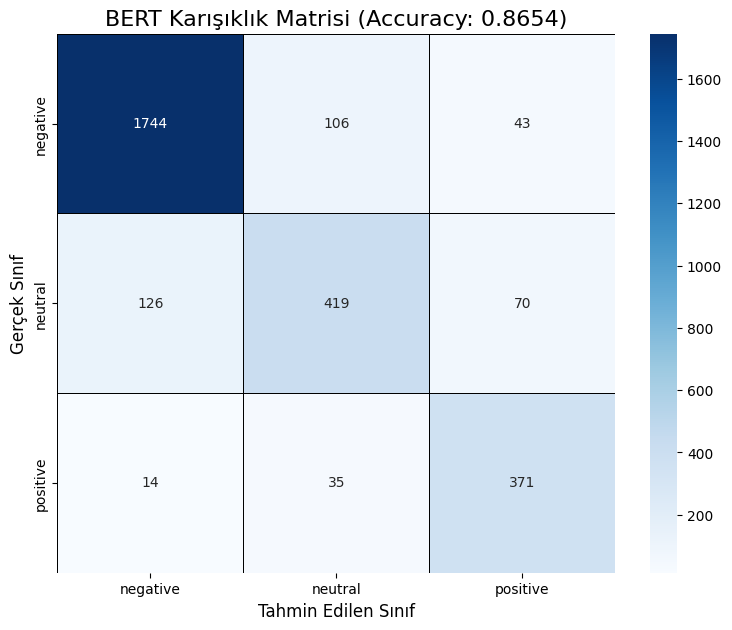


--- Model Karşılaştırma Özeti (F1-Score) ---
Lojistik Regresyon (Ağırlıklandırılmış) Macro F1: 0.71
BERT (İnce Ayarlı) Macro F1: 0.8192


In [22]:

# --- 1. BERT Modelinden Tahminleri Tekrar Al ---
# Trainer, Y_true_bert'i içeren 'predictions' nesnesini döndürür.
predictions = trainer.predict(eval_dataset)
logits = predictions.predictions
Y_pred_bert = np.argmax(logits, axis=-1)
Y_true_bert = predictions.label_ids # İşte aradığımız değişken!

# Orijinal etiket isimlerini tanımlama (Sözlükten tersine çevirme)
label_names = ['negative', 'neutral', 'positive']

# 2. Sayısal Etiketleri Geri Metne Çevirme (Görselleştirme için)
Y_pred_labels = [label_names[p] for p in Y_pred_bert]
Y_true_labels = [label_names[l] for l in Y_true_bert]

# --- 3. Nihai Sınıflandırma Raporu ---
print("\n--- BERT Modelinin Sınıflandırma Raporu (Final) ---")
print(classification_report(Y_true_labels, Y_pred_labels, target_names=label_names))

# --- 4. Karışıklık Matrisi Görselleştirmesi ---
cm_bert = confusion_matrix(Y_true_labels, Y_pred_labels, labels=label_names)

plt.figure(figsize=(9, 7))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names,
            linecolor='black', linewidths=.5)

plt.title(f'BERT Karışıklık Matrisi (Accuracy: {accuracy_score(Y_true_labels, Y_pred_labels):.4f})', fontsize=16)
plt.ylabel('Gerçek Sınıf', fontsize=12)
plt.xlabel('Tahmin Edilen Sınıf', fontsize=12)
plt.show()

# --- 5. Model Karşılaştırma Özeti (Rapor için) ---
print("\n--- Model Karşılaştırma Özeti (F1-Score) ---")
print(f"Lojistik Regresyon (Ağırlıklandırılmış) Macro F1: 0.71")
print(f"BERT (İnce Ayarlı) Macro F1: {f1_score(Y_true_labels, Y_pred_labels, average='macro'):.4f}")

In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

In [24]:
# Modeli Google Drive'a Kaydetme
# Lütfen aşağıdaki yolu kendi Google Drive'ınızdaki istediğiniz klasör yolu ile değiştirin.
save_directory = "/content/drive/MyDrive/Colab Notebooks/Airline_Sentiment/airline_bert_model"

# Eğer klasör yoksa oluştur
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Modeli ve Tokenizer'ı Kaydet
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model ve tokenizer başarıyla kaydedildi: {save_directory}")

Model ve tokenizer başarıyla kaydedildi: /content/drive/MyDrive/Colab Notebooks/Airline_Sentiment/airline_bert_model


In [26]:
import shutil
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

# --- 1. Yolları Tanımlama ---
drive_model_path = "/content/drive/MyDrive/Colab Notebooks/Airline_Sentiment/airline_bert_model"
local_model_path = "./local_bert_model"
label_names = ['negative', 'neutral', 'positive']

# --- 2. Kopyalama İşlemi (Drive Hatalarından Kaçınmak İçin) ---
print(f"Drive'dan yerel klasöre kopyalanıyor: {drive_model_path}")
try:
    if os.path.exists(local_model_path):
        shutil.rmtree(local_model_path)

    shutil.copytree(drive_model_path, local_model_path)
    print(f"Kopyalama Başarılı! Model artık yerel dizinde: {local_model_path}")

except Exception as e:
    print(f"KRİTİK HATA: Kopyalama başarısız oldu. Hata: {e}")

# --- 3. Model Yükleme Fonksiyonu ---
global loaded_model, loaded_tokenizer, device
loaded_model = None
loaded_tokenizer = None
device = None

def load_bert_model(model_path):
    global loaded_model, loaded_tokenizer, device
    try:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        loaded_tokenizer = AutoTokenizer.from_pretrained(model_path)
        loaded_model = AutoModelForSequenceClassification.from_pretrained(model_path)
        loaded_model.to(device)
        print(f"\nModel {model_path} yolundan BAŞARILIYLA yüklendi.")
        return True

    except Exception as e:
        print(f"KRİTİK HATA: Model yüklenirken bir sorun oluştu. Hata: {e}")
        return False

# Modeli YÜKLE
load_bert_model(local_model_path)

def predict_sentiment(text_input):
    if loaded_model is None:
        return "HATA: Model yüklenmediği için tahmin yapılamıyor."

    inputs = loaded_tokenizer(text_input, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = loaded_model(**inputs)

    logits = outputs.logits
    prediction_index = torch.argmax(logits, dim=-1).item()

    return label_names[prediction_index]

# --- 4. SON TEST VE GİTHUB ÇIKTISI ---
print("\n--- Model Testi ---")
test_tweet_neg = "My flight was canceled and I spent six hours waiting at the gate. Terrible service."
test_tweet_pos = "Great service and the staff was super friendly! Best flight experience ever."

print(f"Negatif Test Tahmini: {predict_sentiment(test_tweet_neg)}")
print(f"Pozitif Test Tahmini: {predict_sentiment(test_tweet_pos)}")

# Eğer bu testler başarılı olursa:
print("\nPROJE BAŞARILI! Bu fonksiyonlar GitHub'daki API'nizin temelini oluşturacaktır.")

Drive'dan yerel klasöre kopyalanıyor: /content/drive/MyDrive/Colab Notebooks/Airline_Sentiment/airline_bert_model
Kopyalama Başarılı! Model artık yerel dizinde: ./local_bert_model


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



Model ./local_bert_model yolundan BAŞARILIYLA yüklendi.

--- Model Testi ---
Negatif Test Tahmini: negative
Pozitif Test Tahmini: positive

PROJE BAŞARILI! Bu fonksiyonlar GitHub'daki API'nizin temelini oluşturacaktır.
